In [1]:
#K-Means is unsupervised algorithm
#used for clustering / summarizing / grouping data
#since distance metric is involved scaling of features will be helpful
#Principal Component Analysis (PCA) is generally done for higher dimensional data

#Step 1: Choose the number of clusters k
#Step 2: Select k random points from the data as centroids
#Step 3: Assign all the points to the closest cluster centroid
#Step 4: Recompute the centroids of newly formed clusters
#Step 5: Repeat steps 3 and 4

#distance measures - Euclidean, Squared Euclidean, Mahalanlobis, Manhattan

#Elbow curve to identify no of clusters
#For different number of clusters summed Within Cluster Sum of Squares (WCSS) is plotted and the 
#point where the elbow is formed is chosen as the number of ideal clusters
#WCSS - sum (distance of points within a cluster from the centroid)

#Shiloutte score can also be used to identify no of ideal  clusters


#Kmeans++, the random centroids are created in such a way that they are far away from each other
#first randomly a point is pciked as centroid
#the distance of all other points are claculated and the probability of a point becoming the next centroid is
#proportional to the distance to closest centroid already selected.

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#read data
df = pd.read_excel("Income.xlsx")

print (df.head())

print ('shape', df.shape)

      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000
shape (22, 3)


Text(0, 0.5, 'Income($)')

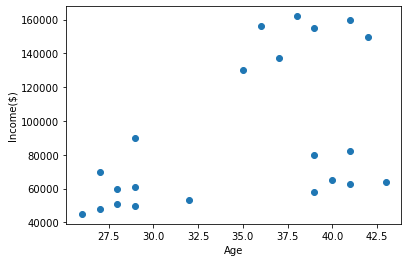

In [4]:
#plot
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
#K-Means with 3 clusters without scaling
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
#view predicted
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


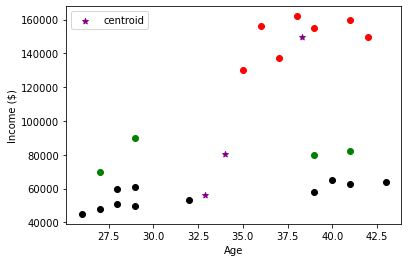

In [7]:
#plot predicted clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#clusters look not good due to non-scaling

In [8]:
#use faeture scaling
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df
#Income($) & Age features are scaled

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [9]:
#cluster after feature scaling
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [10]:
#append cluster
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [11]:
#centroids
km.cluster_centers_

#for each feature there is a centroid

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

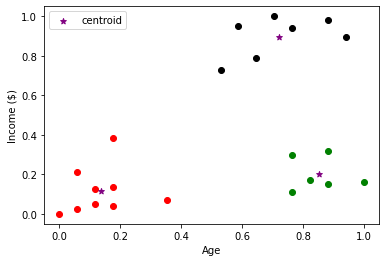

In [12]:
#visualise clusters afetr feature scaling
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#cluster looks appropriate

In [13]:
#Elbow curve
#inertia gives sse (WCSS)
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


C:\Users\vasan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


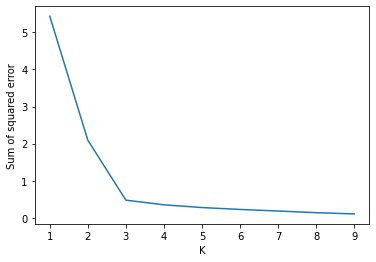

In [14]:
#plot elbow curve
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)